In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

## 귀하의 국가에서 인기 있는 음악콘텐츠는 어느 국가의 콘텐츠입니까?

### 데이터 소개

```
 - 국내 유일의 해외 한류콘텐츠 소비자 조사 자료인 해외한류실태조사를 연도별, 국가별로 통합 가공한 데이터
 - 특정 질문에 대한 중국, 일본, 대만 등 총 14~17개국의 응답결과를 알 수 있음
 - Q. 귀하의 국가에서 인기 있는 문화콘텐츠는 어느 국가의 문화콘텐츠입니까?
 - n(조사 응답자)값은 연도별로 차이가 있음
 - 수치 단위는 % 이며, 표본 수를 전체, 성별, 연령대별로 나눈 응답비율임
 ㅇ 데이터출처
 - 한국국제문화교류진흥원 (http:/kofice.or.kr)의 해외한류실태조사 결과보고서
```

| 순서 | 컬럼영문명         | 컬럼한글명     | 데이터타입 | 길이   | PK여부 | NOT NULL여부 |
|------|--------------------|----------------|------------|--------|--------|---------------|
| 1    | COUNTRY_NM         | 국가명         | VARCHAR    | 200    | N      | Y             |
| 2    | COUNTRY_RANK_NM    | 국가순위명     | VARCHAR    | 200    | N      | Y             |
| 3    | ALL_TOTAL_CO       | 전체총합수     | DECIMAL    | 38     | N      | N             |
| 4    | MALE_RATE          | 남자비율       | DECIMAL    | 28,5   | N      | N             |
| 5    | FEMALE_RATE        | 여자비율       | DECIMAL    | 28,5   | N      | N             |
| 6    | ALL_N10S_RATE      | 전체10대비율   | DECIMAL    | 28,5   | N      | N             |
| 7    | ALL_N20S_RATE      | 전체20대비율   | DECIMAL    | 28,5   | N      | N             |
| 8    | ALL_N30S_RATE      | 전체30대비율   | DECIMAL    | 28,5   | N      | N             |
| 9    | ALL_N40S_RATE      | 전체40대비율   | DECIMAL    | 28,5   | N      | N             |
| 10   | ALL_N50S_RATE      | 전체50대비율   | DECIMAL    | 28,5   | N      | N             |
| 11   | EXAMIN_COUNTRY_NM  | 조사국가명     | VARCHAR    | 200    | N      | Y             |
| 12   | REPRT_YEAR_CN      | 보고서년도내용 | VARCHAR    | 500    | N      | Y             |
| 13   | CNTNTS_URL         | 콘텐츠URL      | VARCHAR    | 500    | N      | Y             |

In [4]:
# 데이터 불러오기

df_korea_oversea_info = pd.read_csv('./data/KC_KOREA_OVSEA_CNTNTS_INFO_2024.csv')
df_korea_oversea_info.head(10)

,COUNTRY_NM,COUNTRY_RANK_NM,ALL_TOTAL_CO,MALE_RATE,FEMALE_RATE,ALL_N10S_RATE,ALL_N20S_RATE,ALL_N30S_RATE,ALL_N40S_RATE,ALL_N50S_RATE,EXAMIN_COUNTRY_NM,REPRT_YEAR_CN,CNTNTS_URL
0,한국,1순위,41.0,39.1,43.0,37.3,41.3,43.2,37.8,63.2,중국,2020,드라마
1,미국,2순위,38.0,40.8,35.7,38.2,40.5,36.0,40.8,26.3,중국,2020,드라마
2,일본,3순위,15.0,15.5,14.0,20.0,14.0,16.8,10.2,0.0,중국,2020,드라마
3,한국,1순위,47.0,42.9,51.4,44.7,54.1,48.6,34.9,68.8,중국,2020,예능
4,미국,2순위,27.0,29.6,25.0,30.9,22.0,27.5,31.3,18.8,중국,2020,예능
5,일본,3순위,19.0,21.2,16.3,20.2,17.4,17.4,24.1,0.0,중국,2020,예능
6,미국,1순위,60.0,62.1,57.3,66.7,62.0,58.2,57.5,25.0,중국,2020,영화
7,한국,2순위,25.0,25.8,24.8,18.9,25.0,26.4,25.0,56.3,중국,2020,영화
8,일본,3순위,11.0,10.1,12.6,12.2,9.3,11.8,13.8,6.3,중국,2020,영화
9,미국,1순위,73.0,77.5,68.6,59.5,73.6,81.6,76.9,75.0,일본,2020,드라마


In [5]:
# 컨텐츠 종류
df_korea_oversea_info['CNTNTS_URL'].unique()

array(['드라마', '예능', '영화', '음악', '애니메이션', '출판물', '게임', '패션', '뷰티', '음식',
       '웹툰', '애니메인션'], dtype=object)

In [6]:
# 조사 연도
df_korea_oversea_info['REPRT_YEAR_CN'].unique()

array([2020, 2019, 2021, 2022, 2023, 2024])

In [7]:
# 조사 국가
df_korea_oversea_info['EXAMIN_COUNTRY_NM'].unique()

array(['중국', '일본', '대만', '태국', '말레이시아', '인도네시아', '인도', '베트남', '호주', '미국',
       '브라질', '프랑스', '영국', '러시아', '터키', 'UAE', '남아공', '아르헨티나', '카자흐스탄',
       '캐나다', '멕시코', '이탈리아', '스페인', '독일', '튀르키예', '사우디아라비아', '이집트'],
      dtype=object)

In [8]:
# 예시 작업
df_korea_oversea_info[(df_korea_oversea_info['EXAMIN_COUNTRY_NM'] == '미국') & (df_korea_oversea_info['CNTNTS_URL'] == '음악') & (df_korea_oversea_info['REPRT_YEAR_CN'] == 2022)]

,COUNTRY_NM,COUNTRY_RANK_NM,ALL_TOTAL_CO,MALE_RATE,FEMALE_RATE,ALL_N10S_RATE,ALL_N20S_RATE,ALL_N30S_RATE,ALL_N40S_RATE,ALL_N50S_RATE,EXAMIN_COUNTRY_NM,REPRT_YEAR_CN,CNTNTS_URL
3002,한국,1순위,55.0,53.9,56.3,58.4,50.0,59.2,55.6,50.0,미국,2022,음악
3003,영국,2순위,43.0,44.2,42.5,47.2,37.8,39.4,46.7,53.8,미국,2022,음악
3004,일본,3순위,33.0,29.2,37.1,39.3,33.3,36.6,24.4,19.2,미국,2022,음악
3005,중국,4순위,26.0,26.0,25.1,27.0,30.0,22.5,24.4,15.4,미국,2022,음악
3006,프랑스,5순위,19.0,22.7,15.6,16.9,22.2,15.5,26.7,11.5,미국,2022,음악
3007,독일,6순위,18.0,23.4,12.6,10.1,18.9,23.9,20.0,19.2,미국,2022,음악
3008,이탈리아,7순위,16.0,19.5,13.8,11.2,18.9,15.5,24.4,15.4,미국,2022,음악
3009,기타,8순위,6.0,5.2,6.6,5.6,5.6,2.8,6.7,15.4,미국,2022,음악


In [80]:
# 국가별로 2023,2024년까지 각각 음악 컨텐츠 국가 순위 뽑기

def get_rank_country(df, country, content, year):
    result = df[(df['EXAMIN_COUNTRY_NM'] == country) & (df['CNTNTS_URL'] == content) & (df['REPRT_YEAR_CN'] == year)]
    if not result.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')
        plt.title(f'{year}년 {country}의 {content} 콘텐츠 국가 순위')
        plt.xlabel('국가 순위')
        plt.ylabel('총합')
        plt.show()
    else:
        print(f"{year}년 {country}의 {content} 콘텐츠 데이터가 없습니다.")  

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


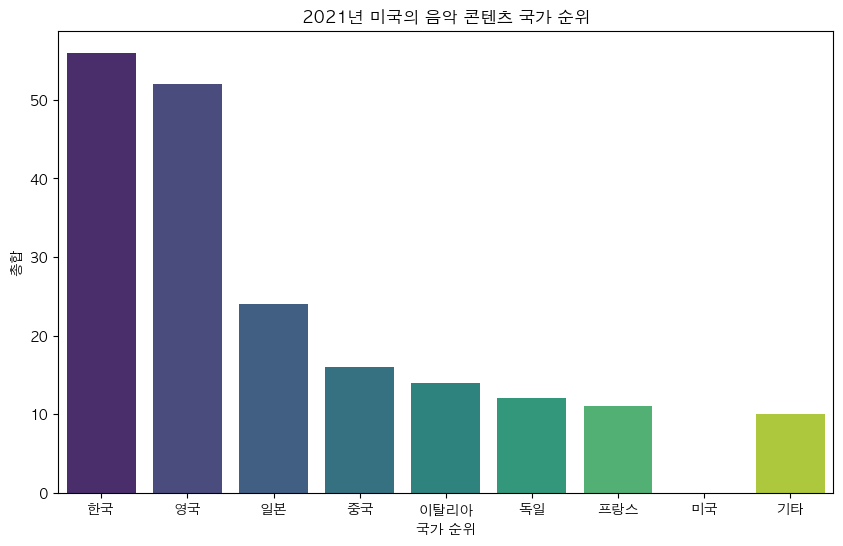

In [105]:
get_rank_country(df_korea_oversea_info, '미국', '음악', 2021)

In [ ]:
# 예시 작업
df_ex = df_korea_oversea_info[(df_korea_oversea_info['EXAMIN_COUNTRY_NM'] == '미국') & (df_korea_oversea_info['CNTNTS_URL'] == '음악') & (df_korea_oversea_info['COUNTRY_NM'] == '한국')]

,COUNTRY_NM,COUNTRY_RANK_NM,ALL_TOTAL_CO,MALE_RATE,FEMALE_RATE,ALL_N10S_RATE,ALL_N20S_RATE,ALL_N30S_RATE,ALL_N40S_RATE,ALL_N50S_RATE,EXAMIN_COUNTRY_NM,REPRT_YEAR_CN,CNTNTS_URL
1212,한국,1순위,56.0,58.5,54.0,61.3,58.9,58.1,50.0,34.4,미국,2021,음악
3002,한국,1순위,55.0,53.9,56.3,58.4,50.0,59.2,55.6,50.0,미국,2022,음악
5031,한국,1순위,65.0,61.2,68.1,67.8,64.5,61.4,64.8,65.5,미국,2023,음악
7992,한국,1순위,68.0,69.5,67.4,68.6,71.8,66.3,68.2,64.2,미국,2024,음악


In [151]:
# 연도별 남녀 성비, 및 연령대 비교 그래프

def plot_gender_ratio(df, country, music_country):
    result = df[(df['EXAMIN_COUNTRY_NM'] == country) & (df['CNTNTS_URL'] == '음악') & (df['COUNTRY_NM'] == music_country)]
    result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)
    """
    연도별 남녀 성비 비교 그래프
    """
    plt.plot(result['REPRT_YEAR_CN'], result['MALE_RATE'], marker="o", label="남성 비율")
    plt.plot(result['REPRT_YEAR_CN'], result['FEMALE_RATE'], marker="o", label="여성 비율")
    
    plt.title(f'{country}의 연도별 {music_country} 음악 소비 남성과 여성 비율')
    plt.xlabel("연도")
    plt.ylabel("비율 (%)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


def plot_age_distribution(df, country, music_country):
    result = df[(df['EXAMIN_COUNTRY_NM'] == country) & (df['CNTNTS_URL'] == '음악') & (df['COUNTRY_NM'] == music_country)]
    result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)
    age_cols=["ALL_N10S_RATE", "ALL_N20S_RATE", "ALL_N30S_RATE", "ALL_N40S_RATE", "ALL_N50S_RATE"]
    """
    연도별 연령대 비율
    """
    for col in age_cols:
        plt.plot(result['REPRT_YEAR_CN'], result[col], marker="o", label=col)
    plt.title(f'{country}의 연도별 {music_country} 음악 소비 연령대 비율')
    plt.xlabel("연도")
    plt.ylabel("비율 (%)")
    plt.legend(title="연령대")
    plt.show()

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


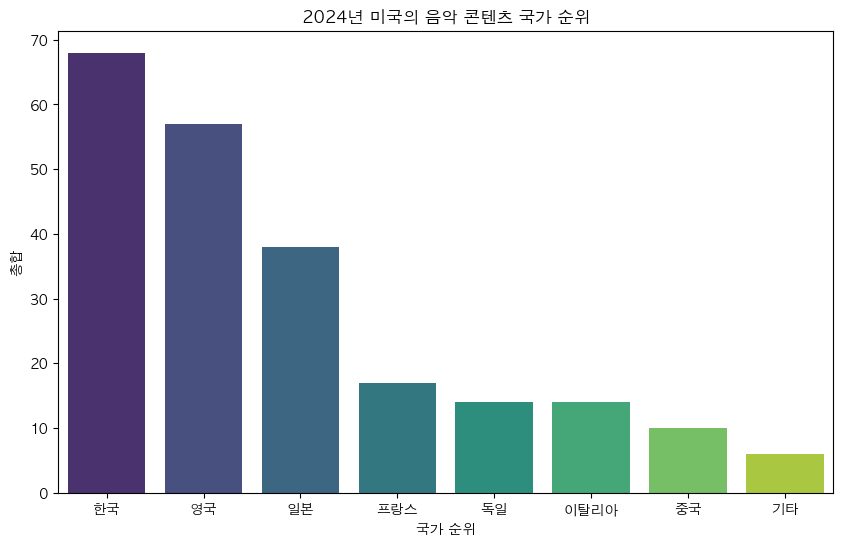

In [128]:
get_rank_country(df_korea_oversea_info, '미국', '음악', 2024)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/835031576.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


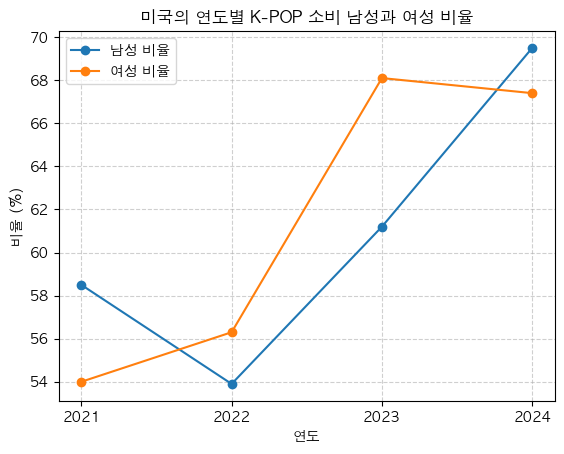

In [149]:
plot_gender_ratio(df_korea_oversea_info, '미국', '한국')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/835031576.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


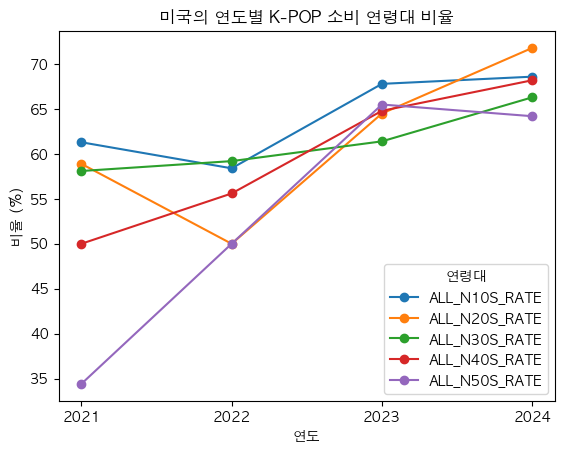

In [150]:
plot_age_distribution(df_korea_oversea_info, '미국', '한국')

---

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/1183647736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


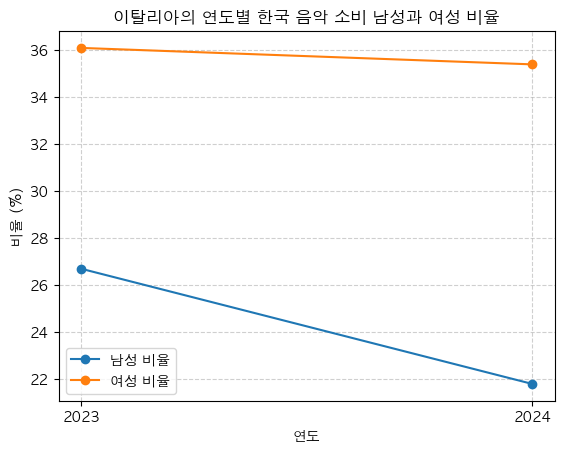

In [153]:
plot_gender_ratio(df_korea_oversea_info, '이탈리아', '한국')
# plot_age_distribution(df_korea_oversea_info, '미국')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/1183647736.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


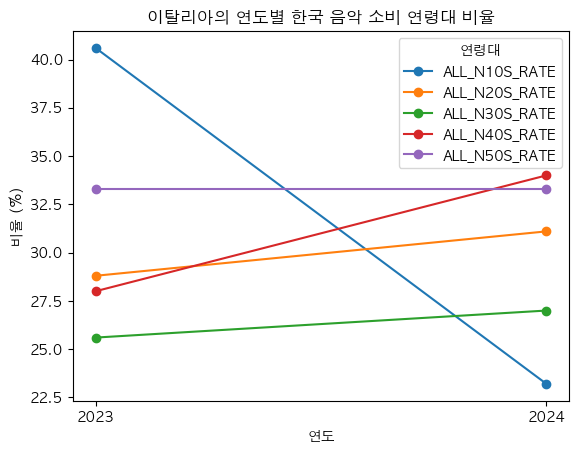

In [152]:
# plot_gender_ratio(df_korea_oversea_info, '미국')
plot_age_distribution(df_korea_oversea_info, '이탈리아', '한국')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


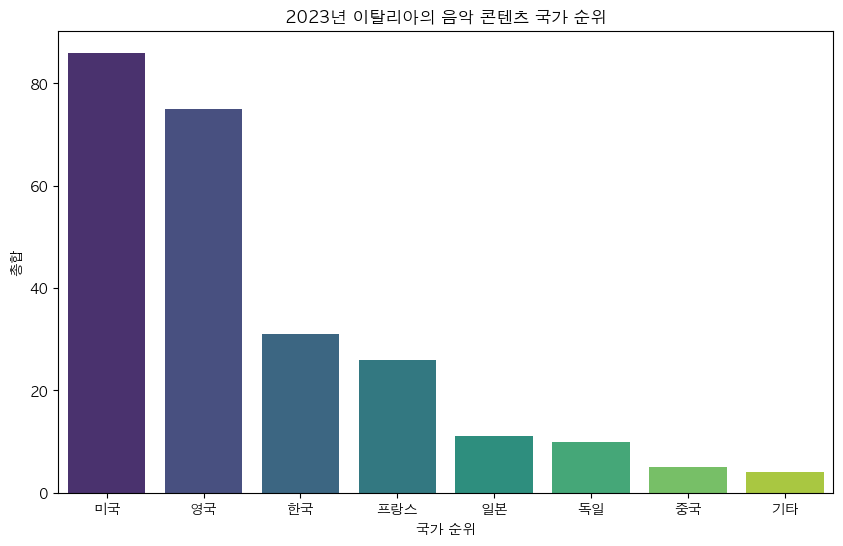

In [83]:
get_rank_country(df_korea_oversea_info, '이탈리아', '음악', 2023)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


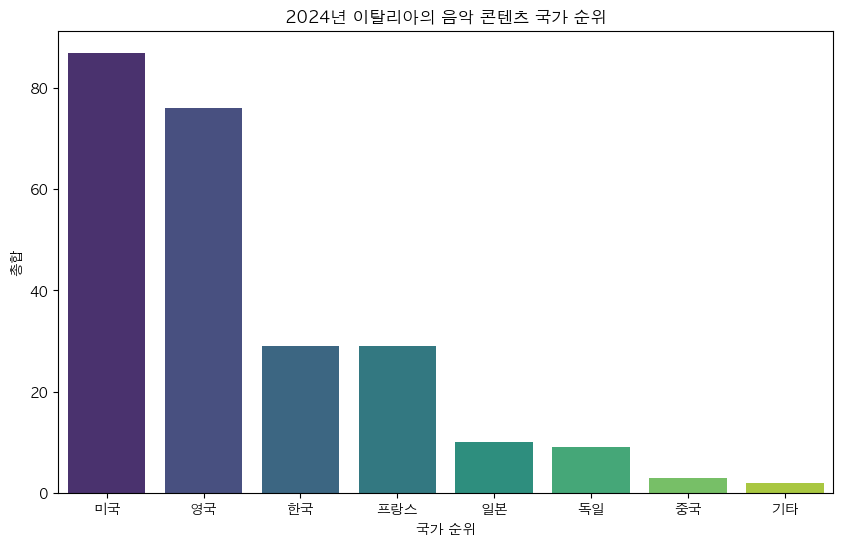

In [84]:
get_rank_country(df_korea_oversea_info, '이탈리아', '음악', 2024)

---

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


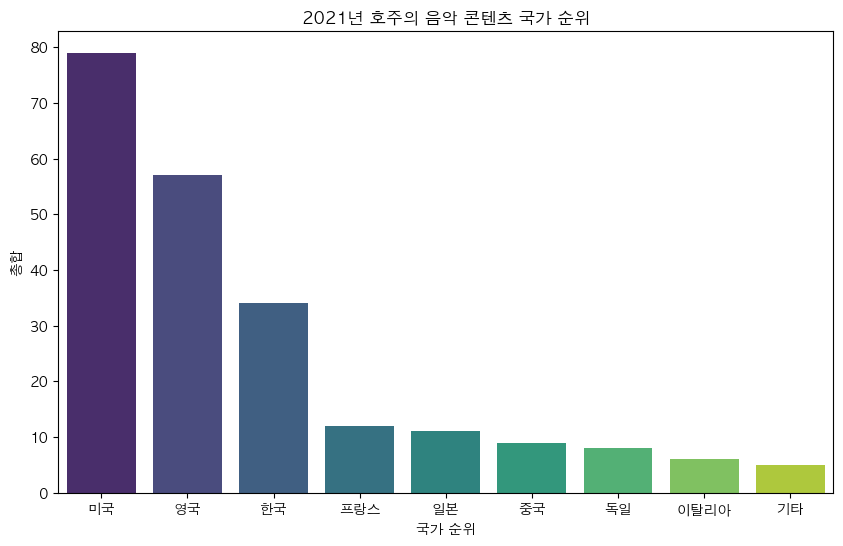

In [85]:
get_rank_country(df_korea_oversea_info, '호주', '음악', 2021)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


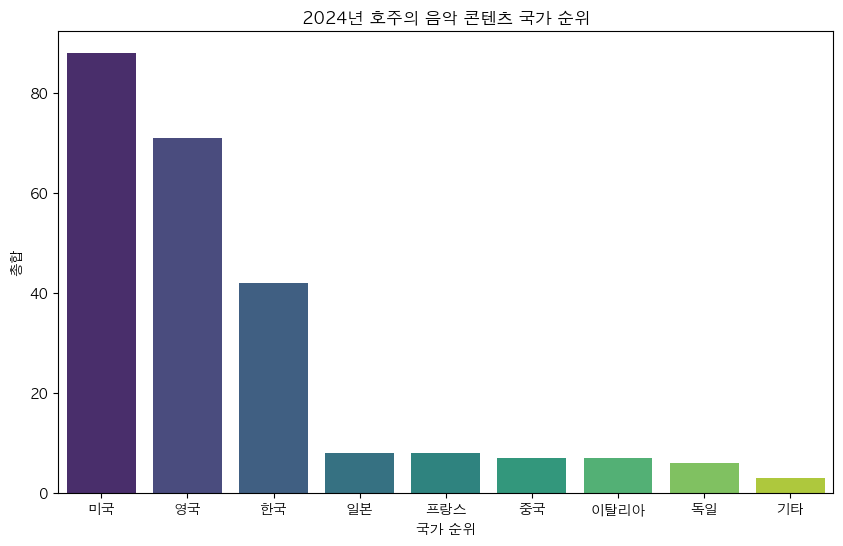

In [86]:
get_rank_country(df_korea_oversea_info, '호주', '음악', 2024)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/1183647736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


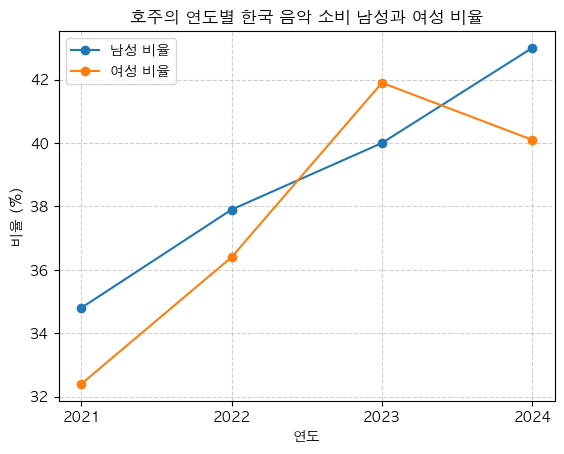

In [ ]:
plot_gender_ratio(df_korea_oversea_info, '호주', '한국')
# plot_age_distribution(df_korea_oversea_info, '이탈리아', '한국')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/1183647736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


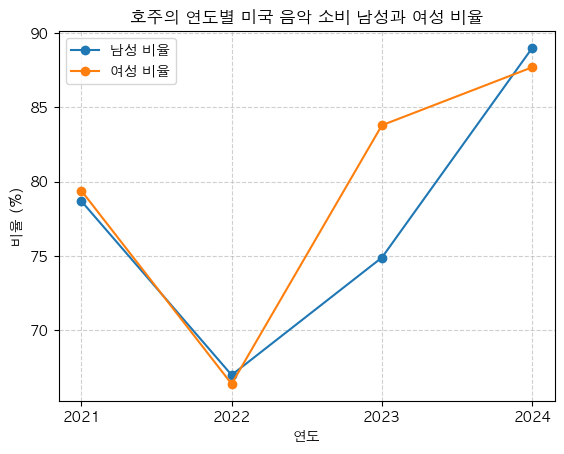

In [162]:
plot_gender_ratio(df_korea_oversea_info, '호주', '미국')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/1183647736.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


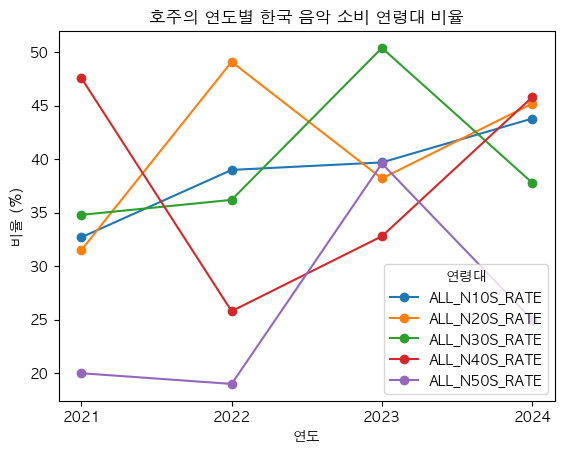

In [161]:
plot_age_distribution(df_korea_oversea_info, '호주', '한국')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/1183647736.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


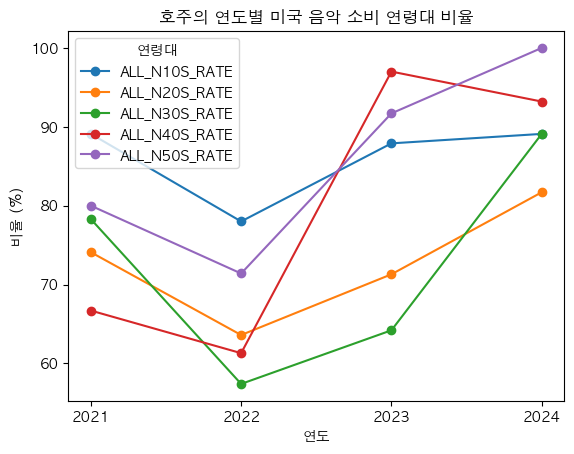

In [163]:
plot_age_distribution(df_korea_oversea_info, '호주', '미국')

---

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


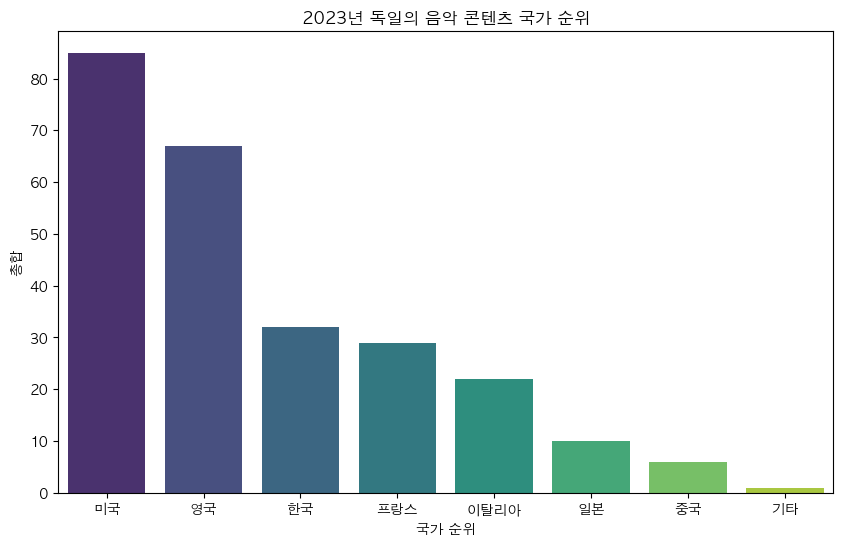

In [87]:
get_rank_country(df_korea_oversea_info, '독일', '음악', 2023)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


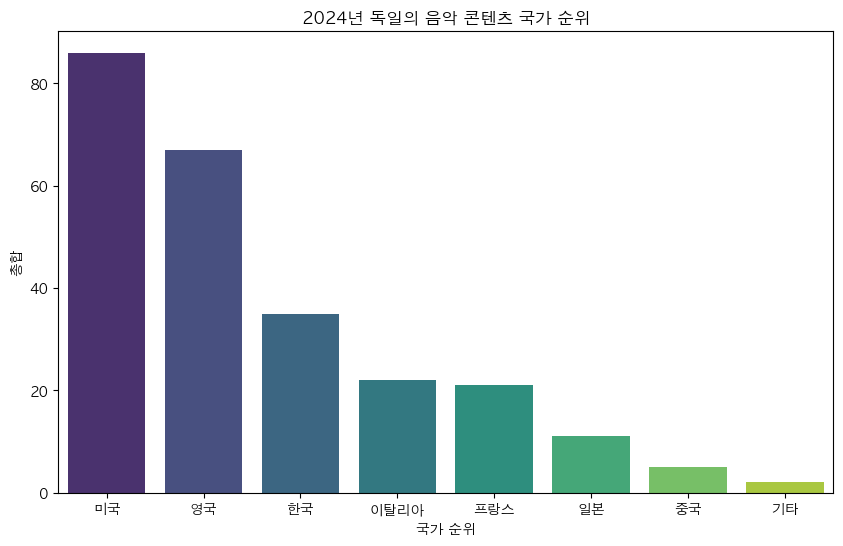

In [88]:
get_rank_country(df_korea_oversea_info, '독일', '음악', 2024)

---

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


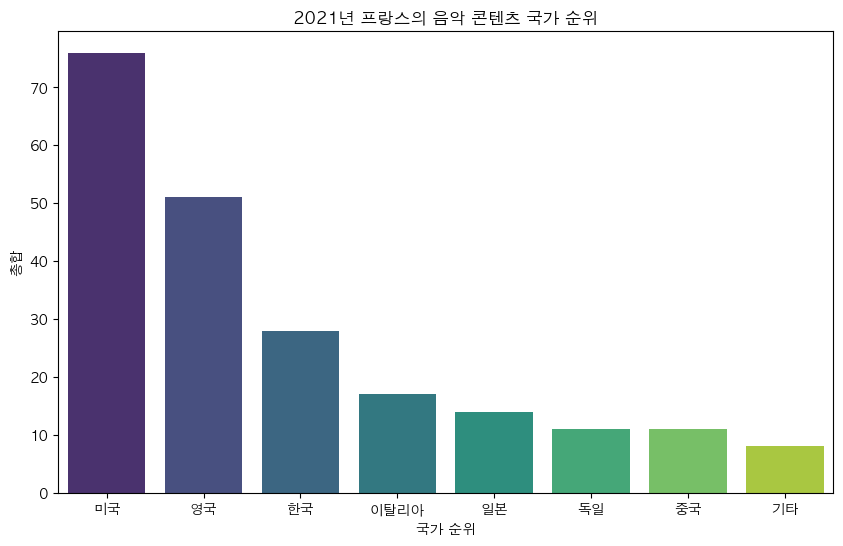

In [89]:
get_rank_country(df_korea_oversea_info, '프랑스', '음악', 2021)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


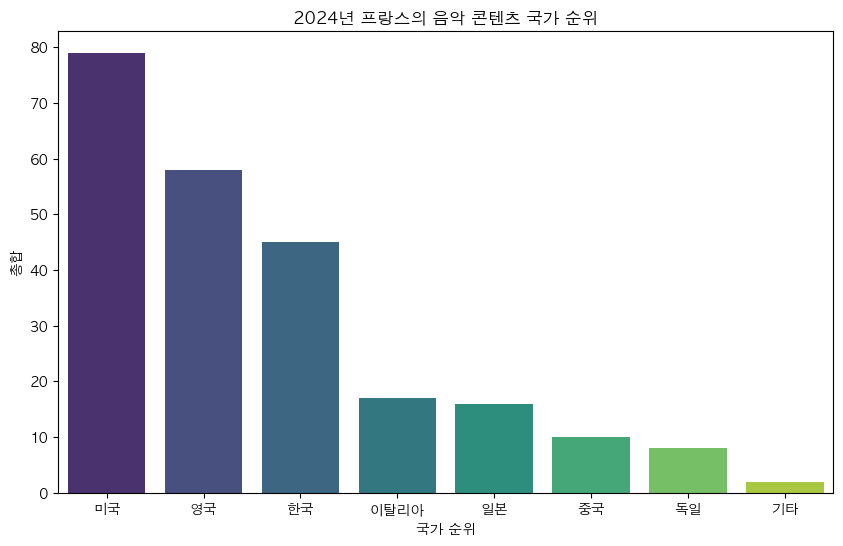

In [90]:
get_rank_country(df_korea_oversea_info, '프랑스', '음악', 2024)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2292380938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


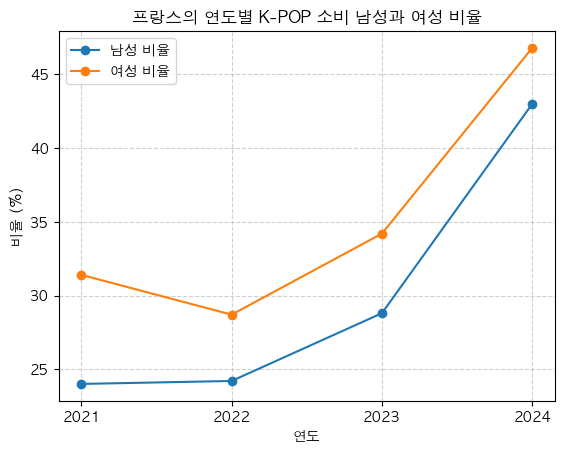

In [ ]:
plot_gender_ratio(df_korea_oversea_info, '프랑스', '한국')
# plot_age_distribution(df_korea_oversea_info, '이탈리아', '한국')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2292380938.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


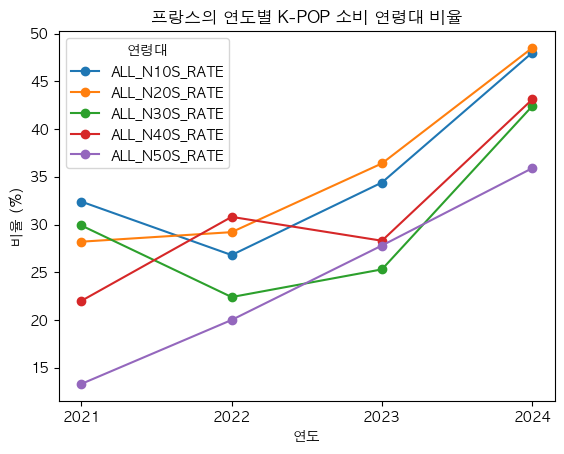

In [135]:
# plot_gender_ratio(df_korea_oversea_info, '미국')
plot_age_distribution(df_korea_oversea_info, '프랑스')

---

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


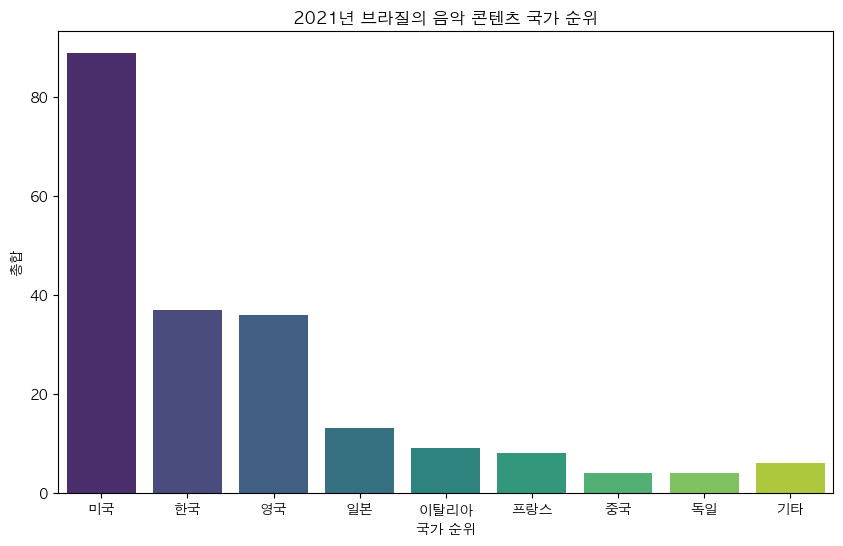

In [91]:
get_rank_country(df_korea_oversea_info, '브라질', '음악', 2021)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


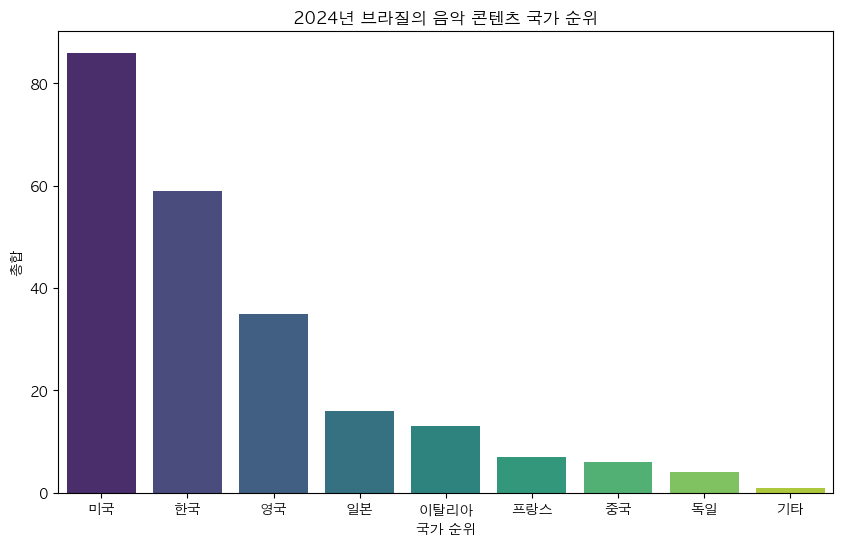

In [92]:
get_rank_country(df_korea_oversea_info, '브라질', '음악', 2024)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2292380938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


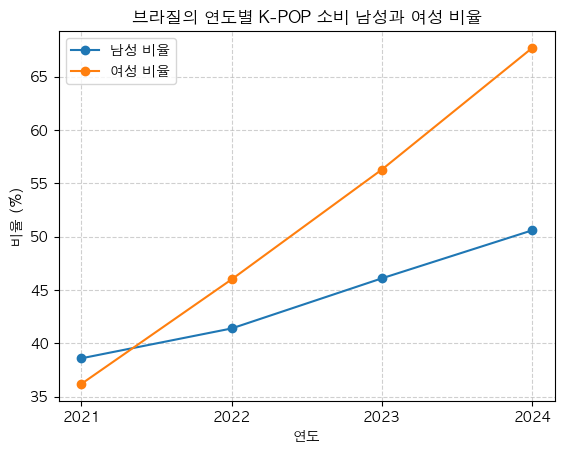

In [136]:
plot_gender_ratio(df_korea_oversea_info, '브라질')
# plot_age_distribution(df_korea_oversea_info, '이탈리아')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2292380938.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


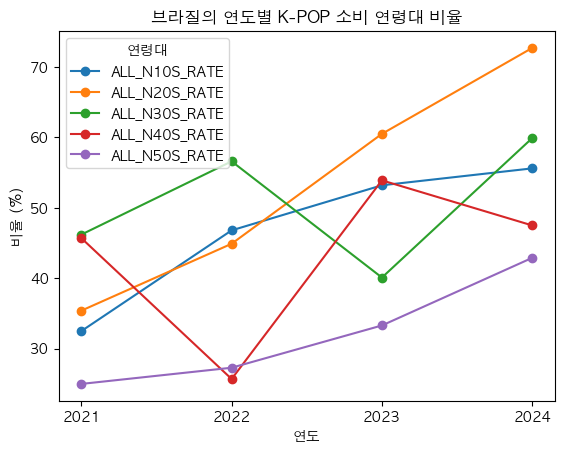

In [137]:
# plot_gender_ratio(df_korea_oversea_info, '브라질')
plot_age_distribution(df_korea_oversea_info, '브라질')

---

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


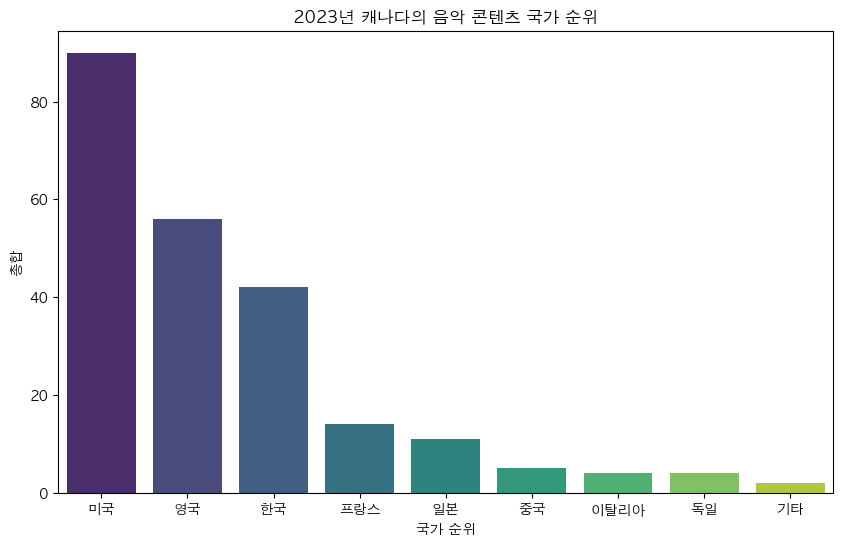

In [93]:
get_rank_country(df_korea_oversea_info, '캐나다', '음악', 2023)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


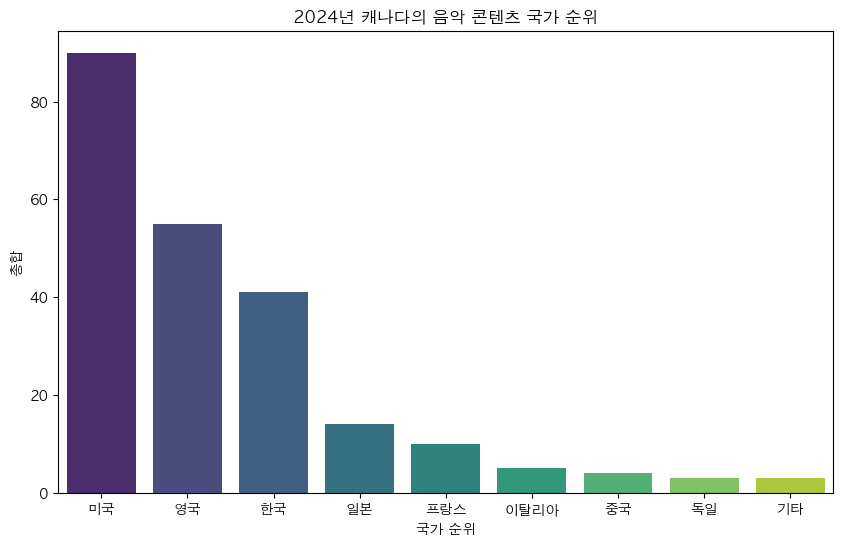

In [94]:
get_rank_country(df_korea_oversea_info, '캐나다', '음악', 2024)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/1183647736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


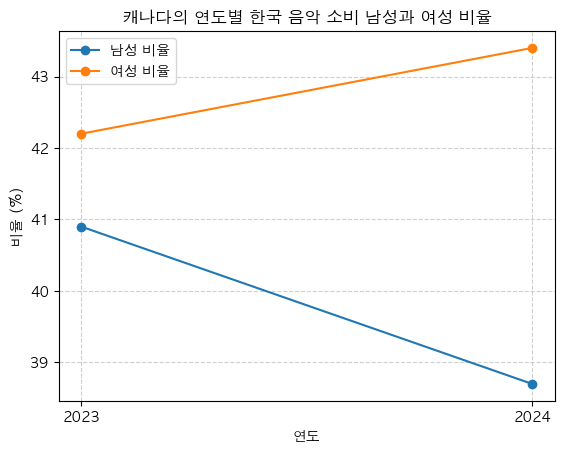

In [154]:
plot_gender_ratio(df_korea_oversea_info, '캐나다', '한국')
# plot_age_distribution(df_korea_oversea_info, '이탈리아')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/1183647736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


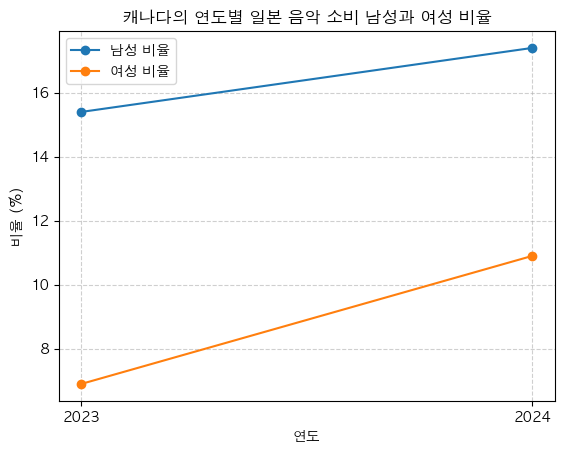

In [155]:
plot_gender_ratio(df_korea_oversea_info, '캐나다', '일본')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/1183647736.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


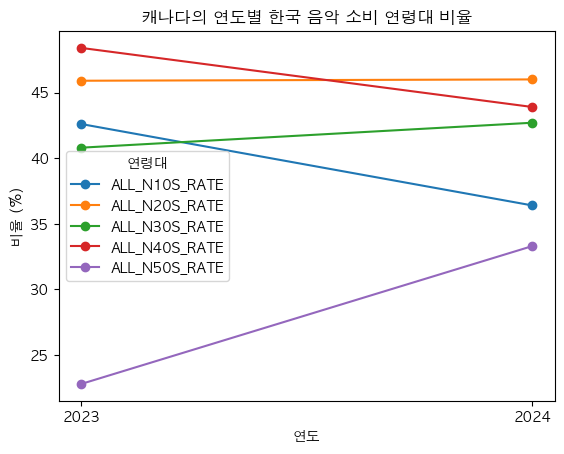

In [156]:
# plot_gender_ratio(df_korea_oversea_info, '브라질')
plot_age_distribution(df_korea_oversea_info, '캐나다', '한국')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/1183647736.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


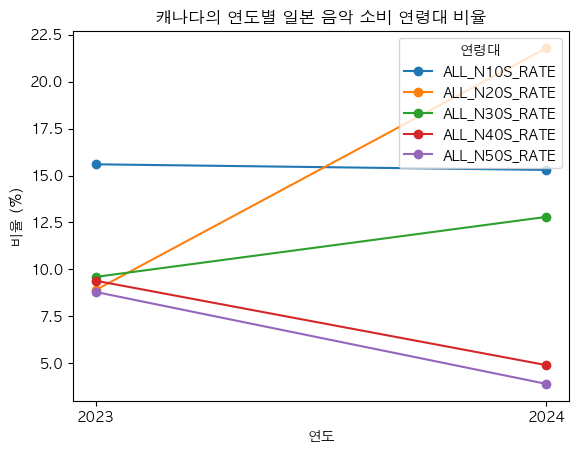

In [157]:
plot_age_distribution(df_korea_oversea_info, '캐나다', '일본')

---

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


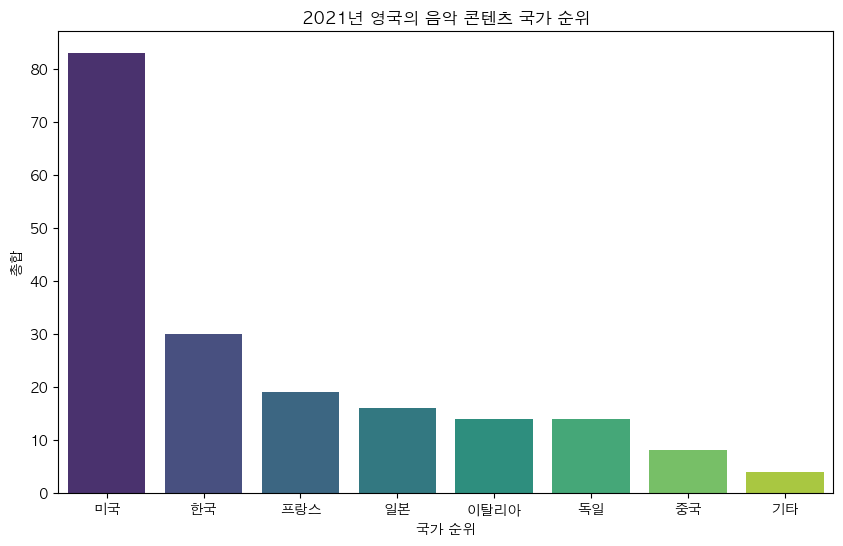

In [95]:
get_rank_country(df_korea_oversea_info, '영국', '음악', 2021)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


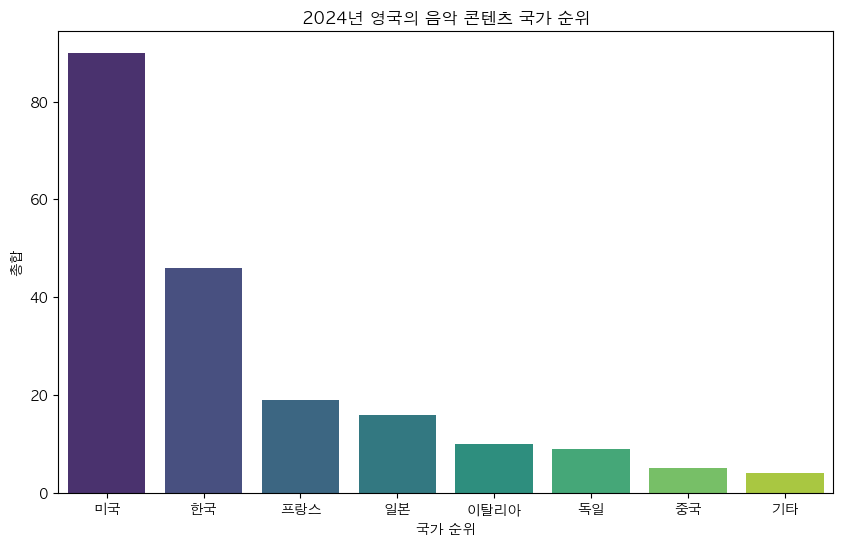

In [96]:
get_rank_country(df_korea_oversea_info, '영국', '음악', 2024)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2292380938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


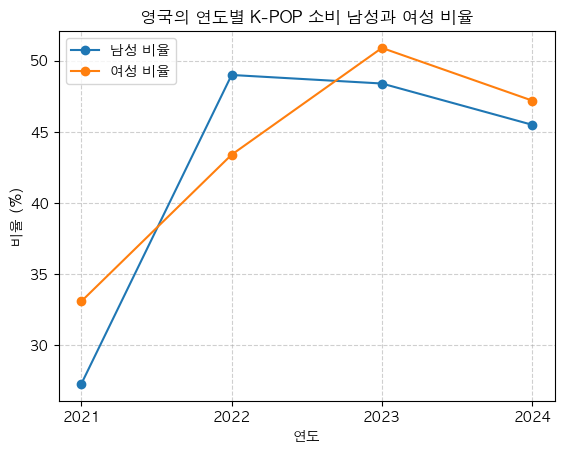

In [140]:
plot_gender_ratio(df_korea_oversea_info, '영국')
# plot_age_distribution(df_korea_oversea_info, '이탈리아')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2292380938.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


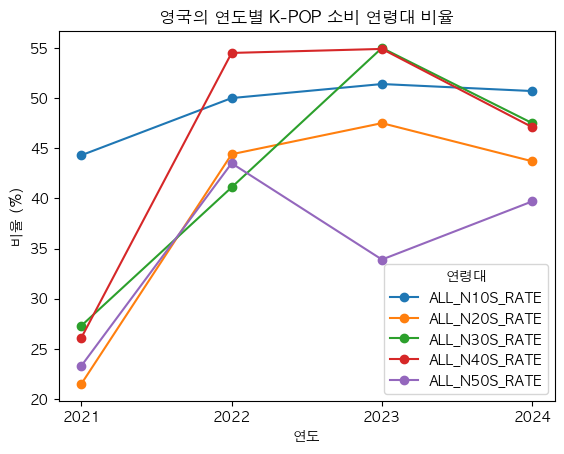

In [141]:
# plot_gender_ratio(df_korea_oversea_info, '브라질')
plot_age_distribution(df_korea_oversea_info, '영국')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


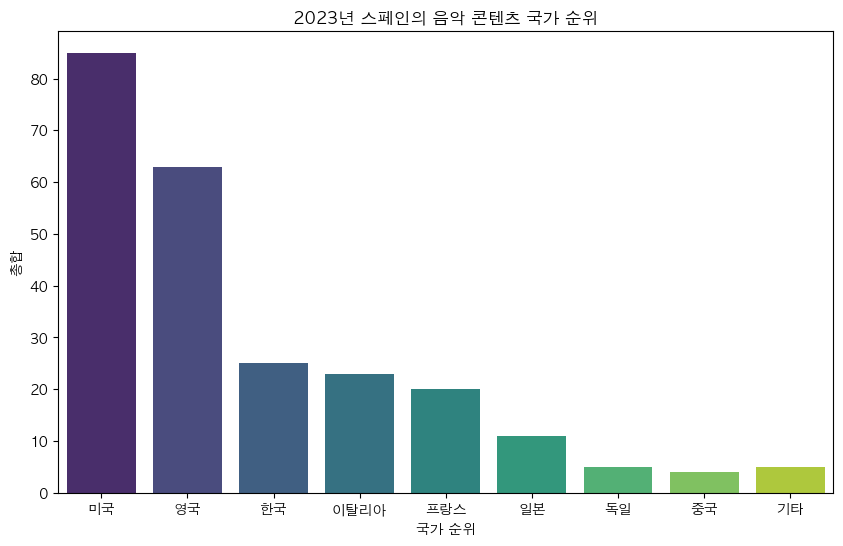

In [97]:
get_rank_country(df_korea_oversea_info, '스페인', '음악', 2023)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


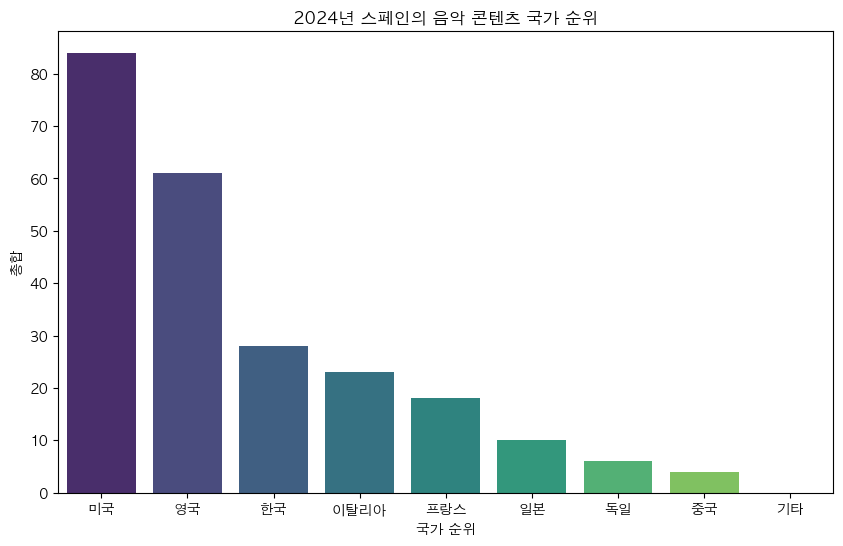

In [98]:
get_rank_country(df_korea_oversea_info, '스페인', '음악', 2024)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/1183647736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


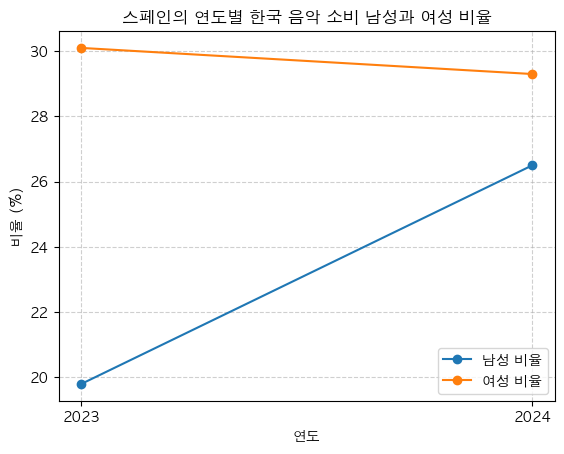

In [158]:
plot_gender_ratio(df_korea_oversea_info, '스페인', '한국')
# plot_age_distribution(df_korea_oversea_info, '이탈리아')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/1183647736.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


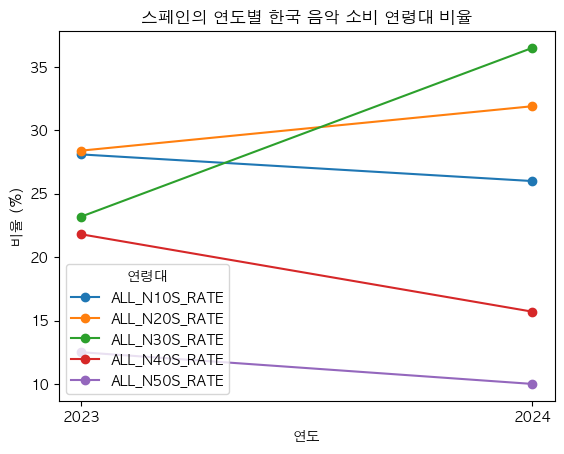

In [159]:
# plot_gender_ratio(df_korea_oversea_info, '브라질')
plot_age_distribution(df_korea_oversea_info, '스페인', '한국')

---

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


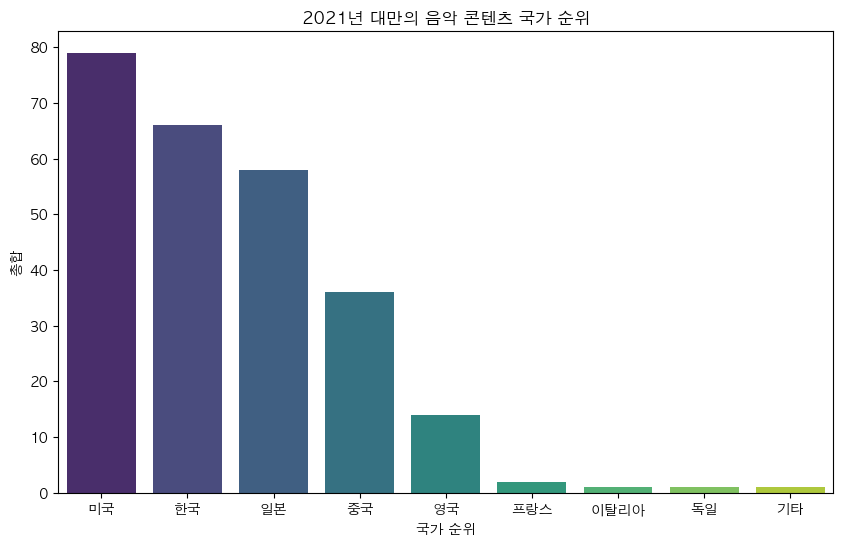

In [99]:
get_rank_country(df_korea_oversea_info, '대만', '음악', 2021)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


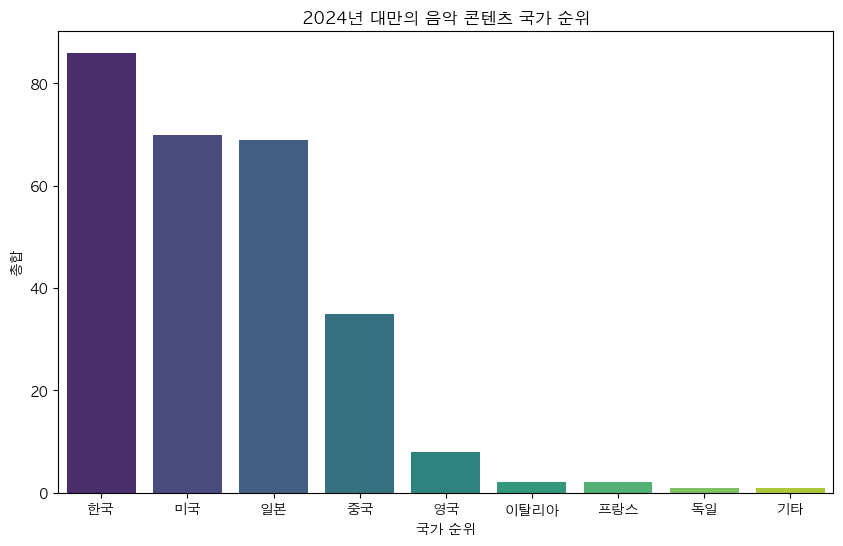

In [100]:
get_rank_country(df_korea_oversea_info, '대만', '음악', 2024)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2292380938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


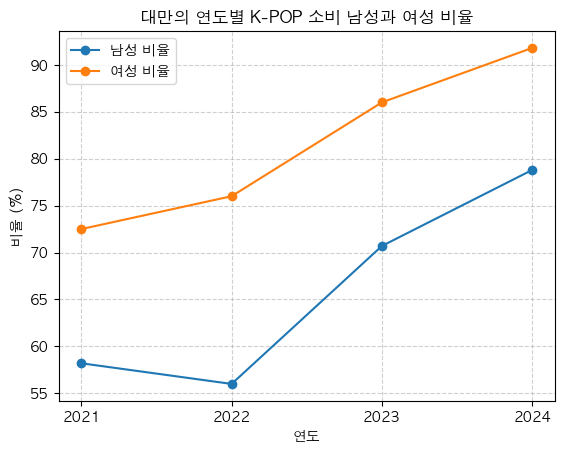

In [144]:
plot_gender_ratio(df_korea_oversea_info, '대만')
# plot_age_distribution(df_korea_oversea_info, '이탈리아')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2292380938.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


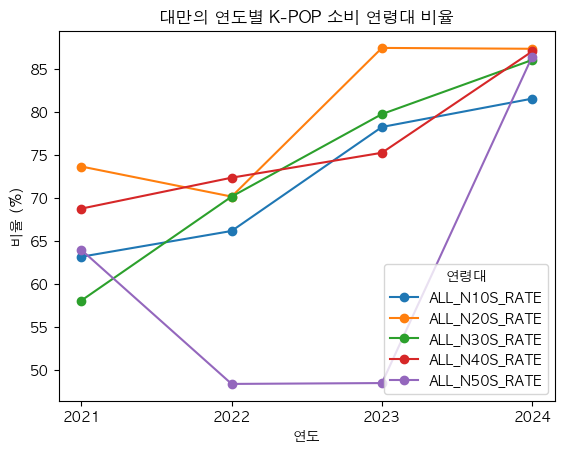

In [145]:
# plot_gender_ratio(df_korea_oversea_info, '브라질')
plot_age_distribution(df_korea_oversea_info, '대만')

---

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


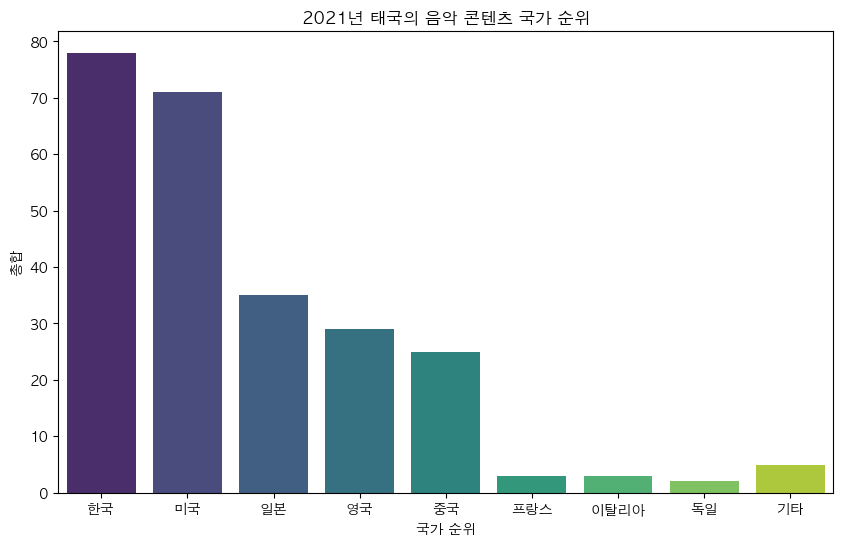

In [101]:
get_rank_country(df_korea_oversea_info, '태국', '음악', 2021)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2527130463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='COUNTRY_NM', y='ALL_TOTAL_CO', palette='viridis')


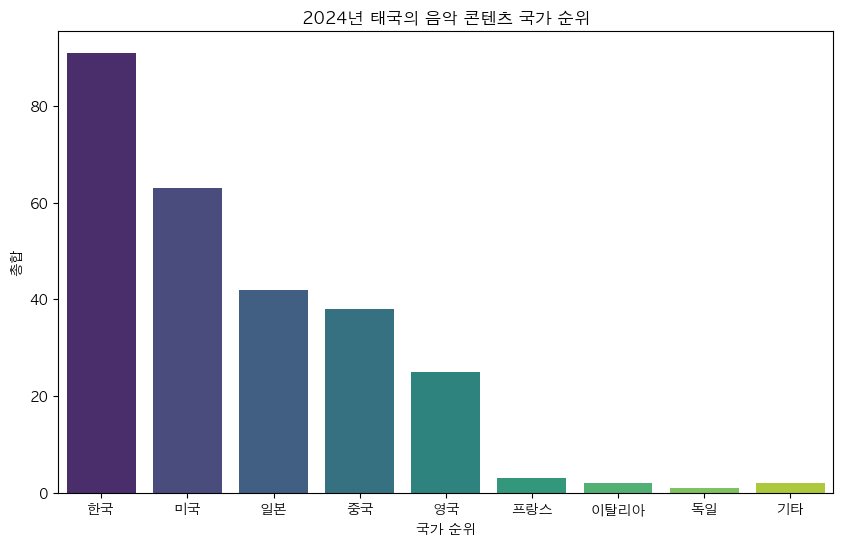

In [102]:
get_rank_country(df_korea_oversea_info, '태국', '음악', 2024)

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2292380938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


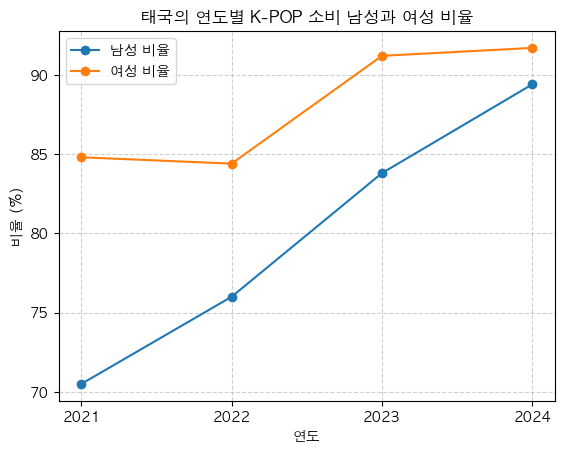

In [146]:
plot_gender_ratio(df_korea_oversea_info, '태국')
# plot_age_distribution(df_korea_oversea_info, '이탈리아')

/var/folders/qb/321sn6b122v_ybdr15388h100000gn/T/ipykernel_98049/2292380938.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['REPRT_YEAR_CN'] = result['REPRT_YEAR_CN'].astype(str)


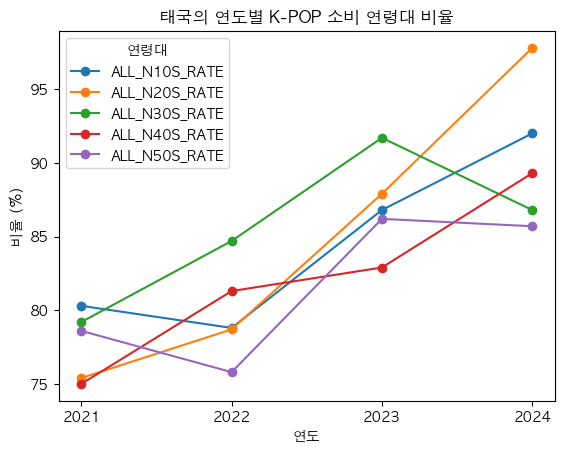

In [147]:
# plot_gender_ratio(df_korea_oversea_info, '브라질')
plot_age_distribution(df_korea_oversea_info, '태국')